# Explore here

In [10]:
#Predicción de precio de AIRBNB's
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
#Hacer dataframe a csv
df.to_csv('../data/raw/raw_data.csv', index=False)


In [12]:
#Eliminar duplicados


df.drop("id", axis=1).duplicated().sum()
#No hay duplicados, entonces no uso dropna 

np.int64(0)

In [13]:
#Eliminar información irrelevante
df.drop(['id', 'name', 'host_name', 'last_review','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
df.info()
#También aquí me doy cuenta si hay nulos!!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


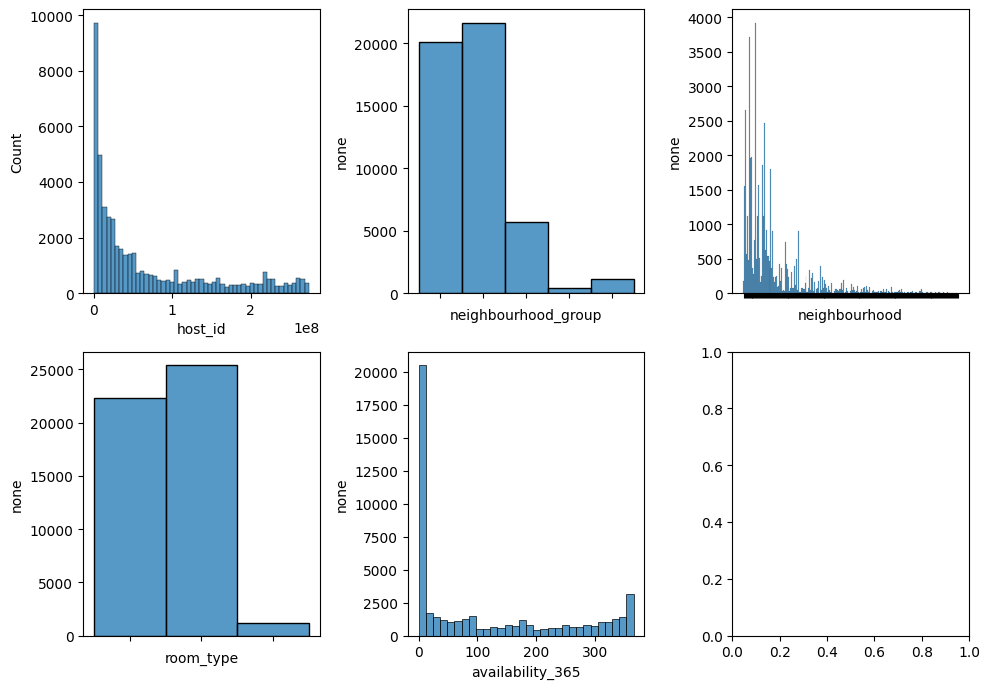

In [14]:
#Ahora se debe hacer análisis univariante
#Análisis de variables categóricas
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3, figsize=(10,7))
sns.histplot(ax= axis[0,0],data=df,x='host_id')
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set(ylabel='none', xticklabels=[])
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set(ylabel='none',xticklabels=[])
sns.histplot(ax= axis[1,0],data=df,x='room_type').set(ylabel='none',xticklabels=[])
sns.histplot(ax= axis[1,1],data=df,x='availability_365').set(ylabel='none')



plt.tight_layout()

plt.show()

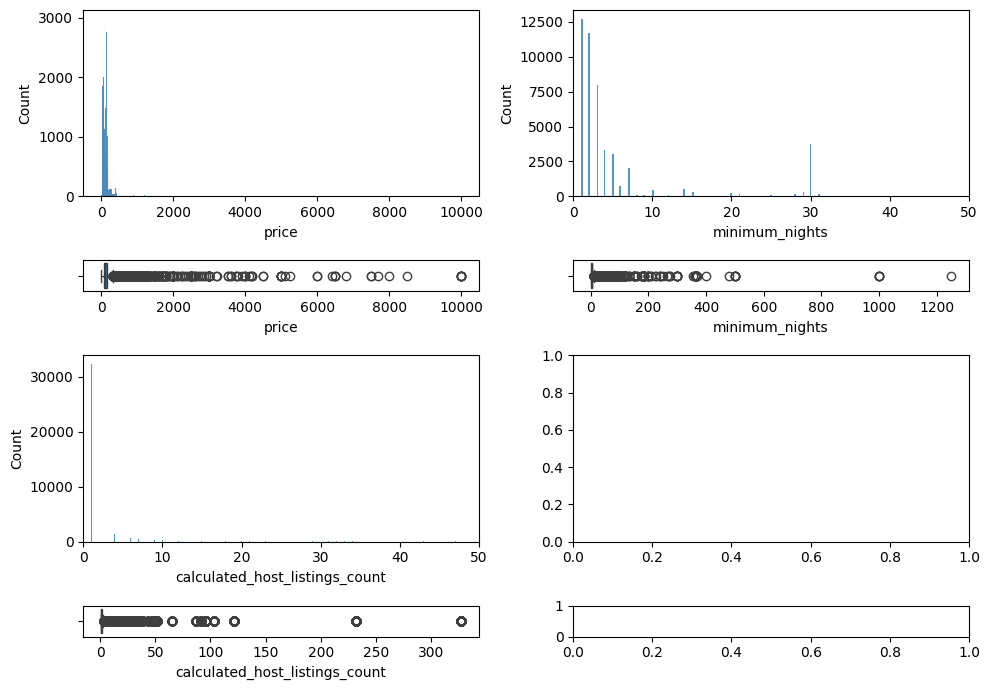

In [29]:
#Ahora se debe realizar un análisis univariante de variables numéricas
#price, minimum_nights, calculated_host_listings_count.

fig, axis = plt.subplots(4,2, figsize=(10,7), gridspec_kw={'height_ratios': [6,1,6,1]})
sns.histplot(ax= axis[0,0],data=df,x='price')
sns.boxplot(ax= axis[1,0],data=df,x='price')
sns.histplot(ax= axis[0,1],data=df,x='minimum_nights').set(xlim=(0,50))
sns.boxplot(ax= axis[1,1],data=df,x='minimum_nights')
sns.histplot(ax= axis[2,0],data=df,x='calculated_host_listings_count').set(xlim=(0,50))
sns.boxplot(ax= axis[3,0],data=df,x='calculated_host_listings_count')


plt.tight_layout()
plt.show()


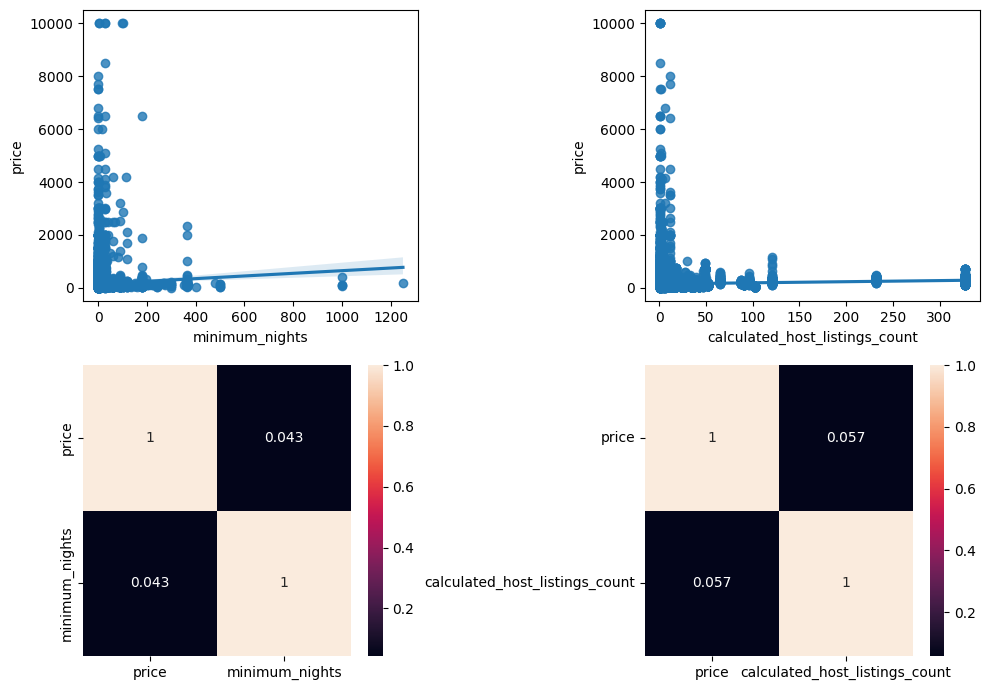

In [ ]:
#Ahora se debe realizar el análisis multivariable

#Primero se inicia con el análisis numérico-numérico para ver el comportamiento de las variables numéricas.
fig, axis= plt.subplots(2,2, figsize=(10,7))

sns.regplot(ax= axis[0,0], data=df, x='minimum_nights', y='price')
sns.heatmap(df[['price','minimum_nights']].corr(), ax=axis[1,0], annot=True)
sns.regplot(ax= axis[0,1], data=df, x='calculated_host_listings_count', y='price')
sns.heatmap(df[['price','calculated_host_listings_count']].corr(), ax=axis[1,1], annot=True)

plt.tight_layout()
plt.show()

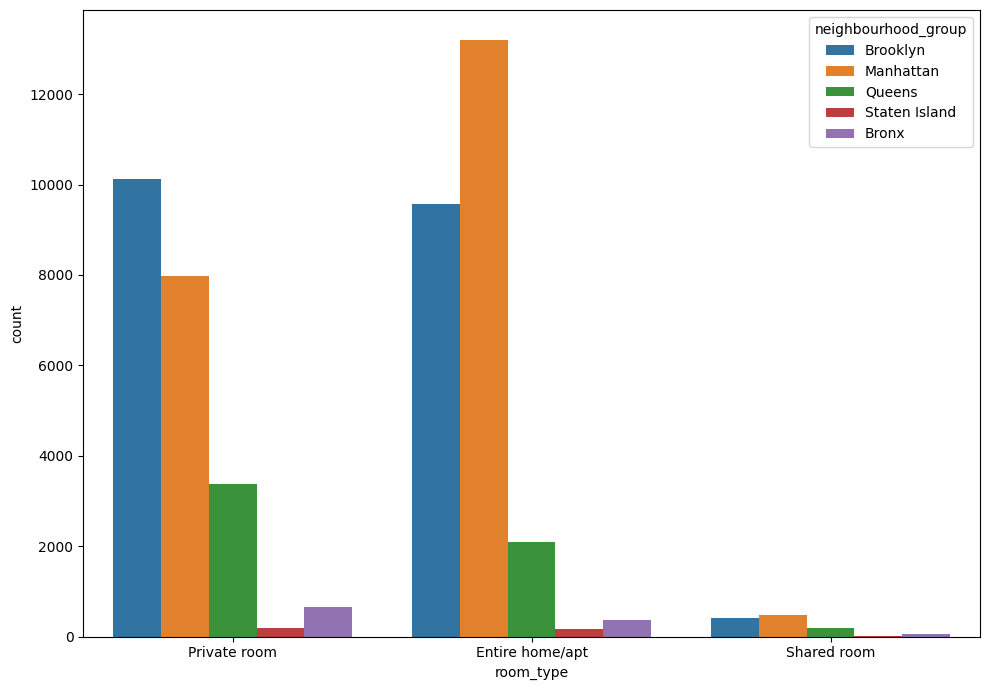

In [54]:
#Análisis categórico - categórico

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(data=df, x='room_type', hue='neighbourhood_group')

plt.tight_layout()
plt.show()

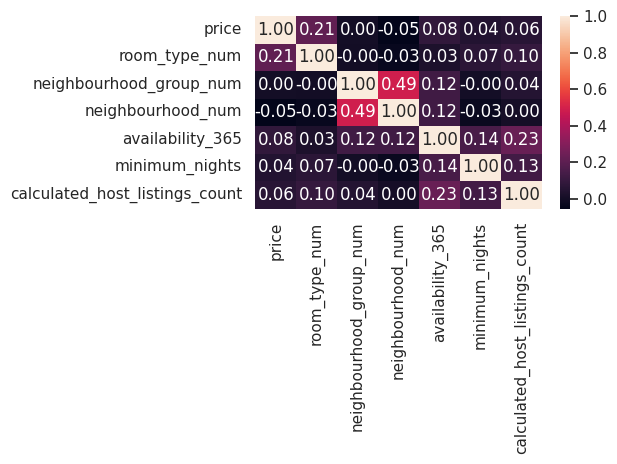

In [62]:
#análisis numérico-categórico
#Vamos a volver numéricas las variables categóricas con el siguiente código:
df['room_type_num'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_num'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood_num'] = pd.factorize(df['neighbourhood'])[0]

sns.heatmap(df[['price','room_type_num','neighbourhood_group_num','neighbourhood_num','availability_365','minimum_nights','calculated_host_listings_count']].corr(), annot=True,fmt='.2f')



plt.tight_layout()
plt.show()


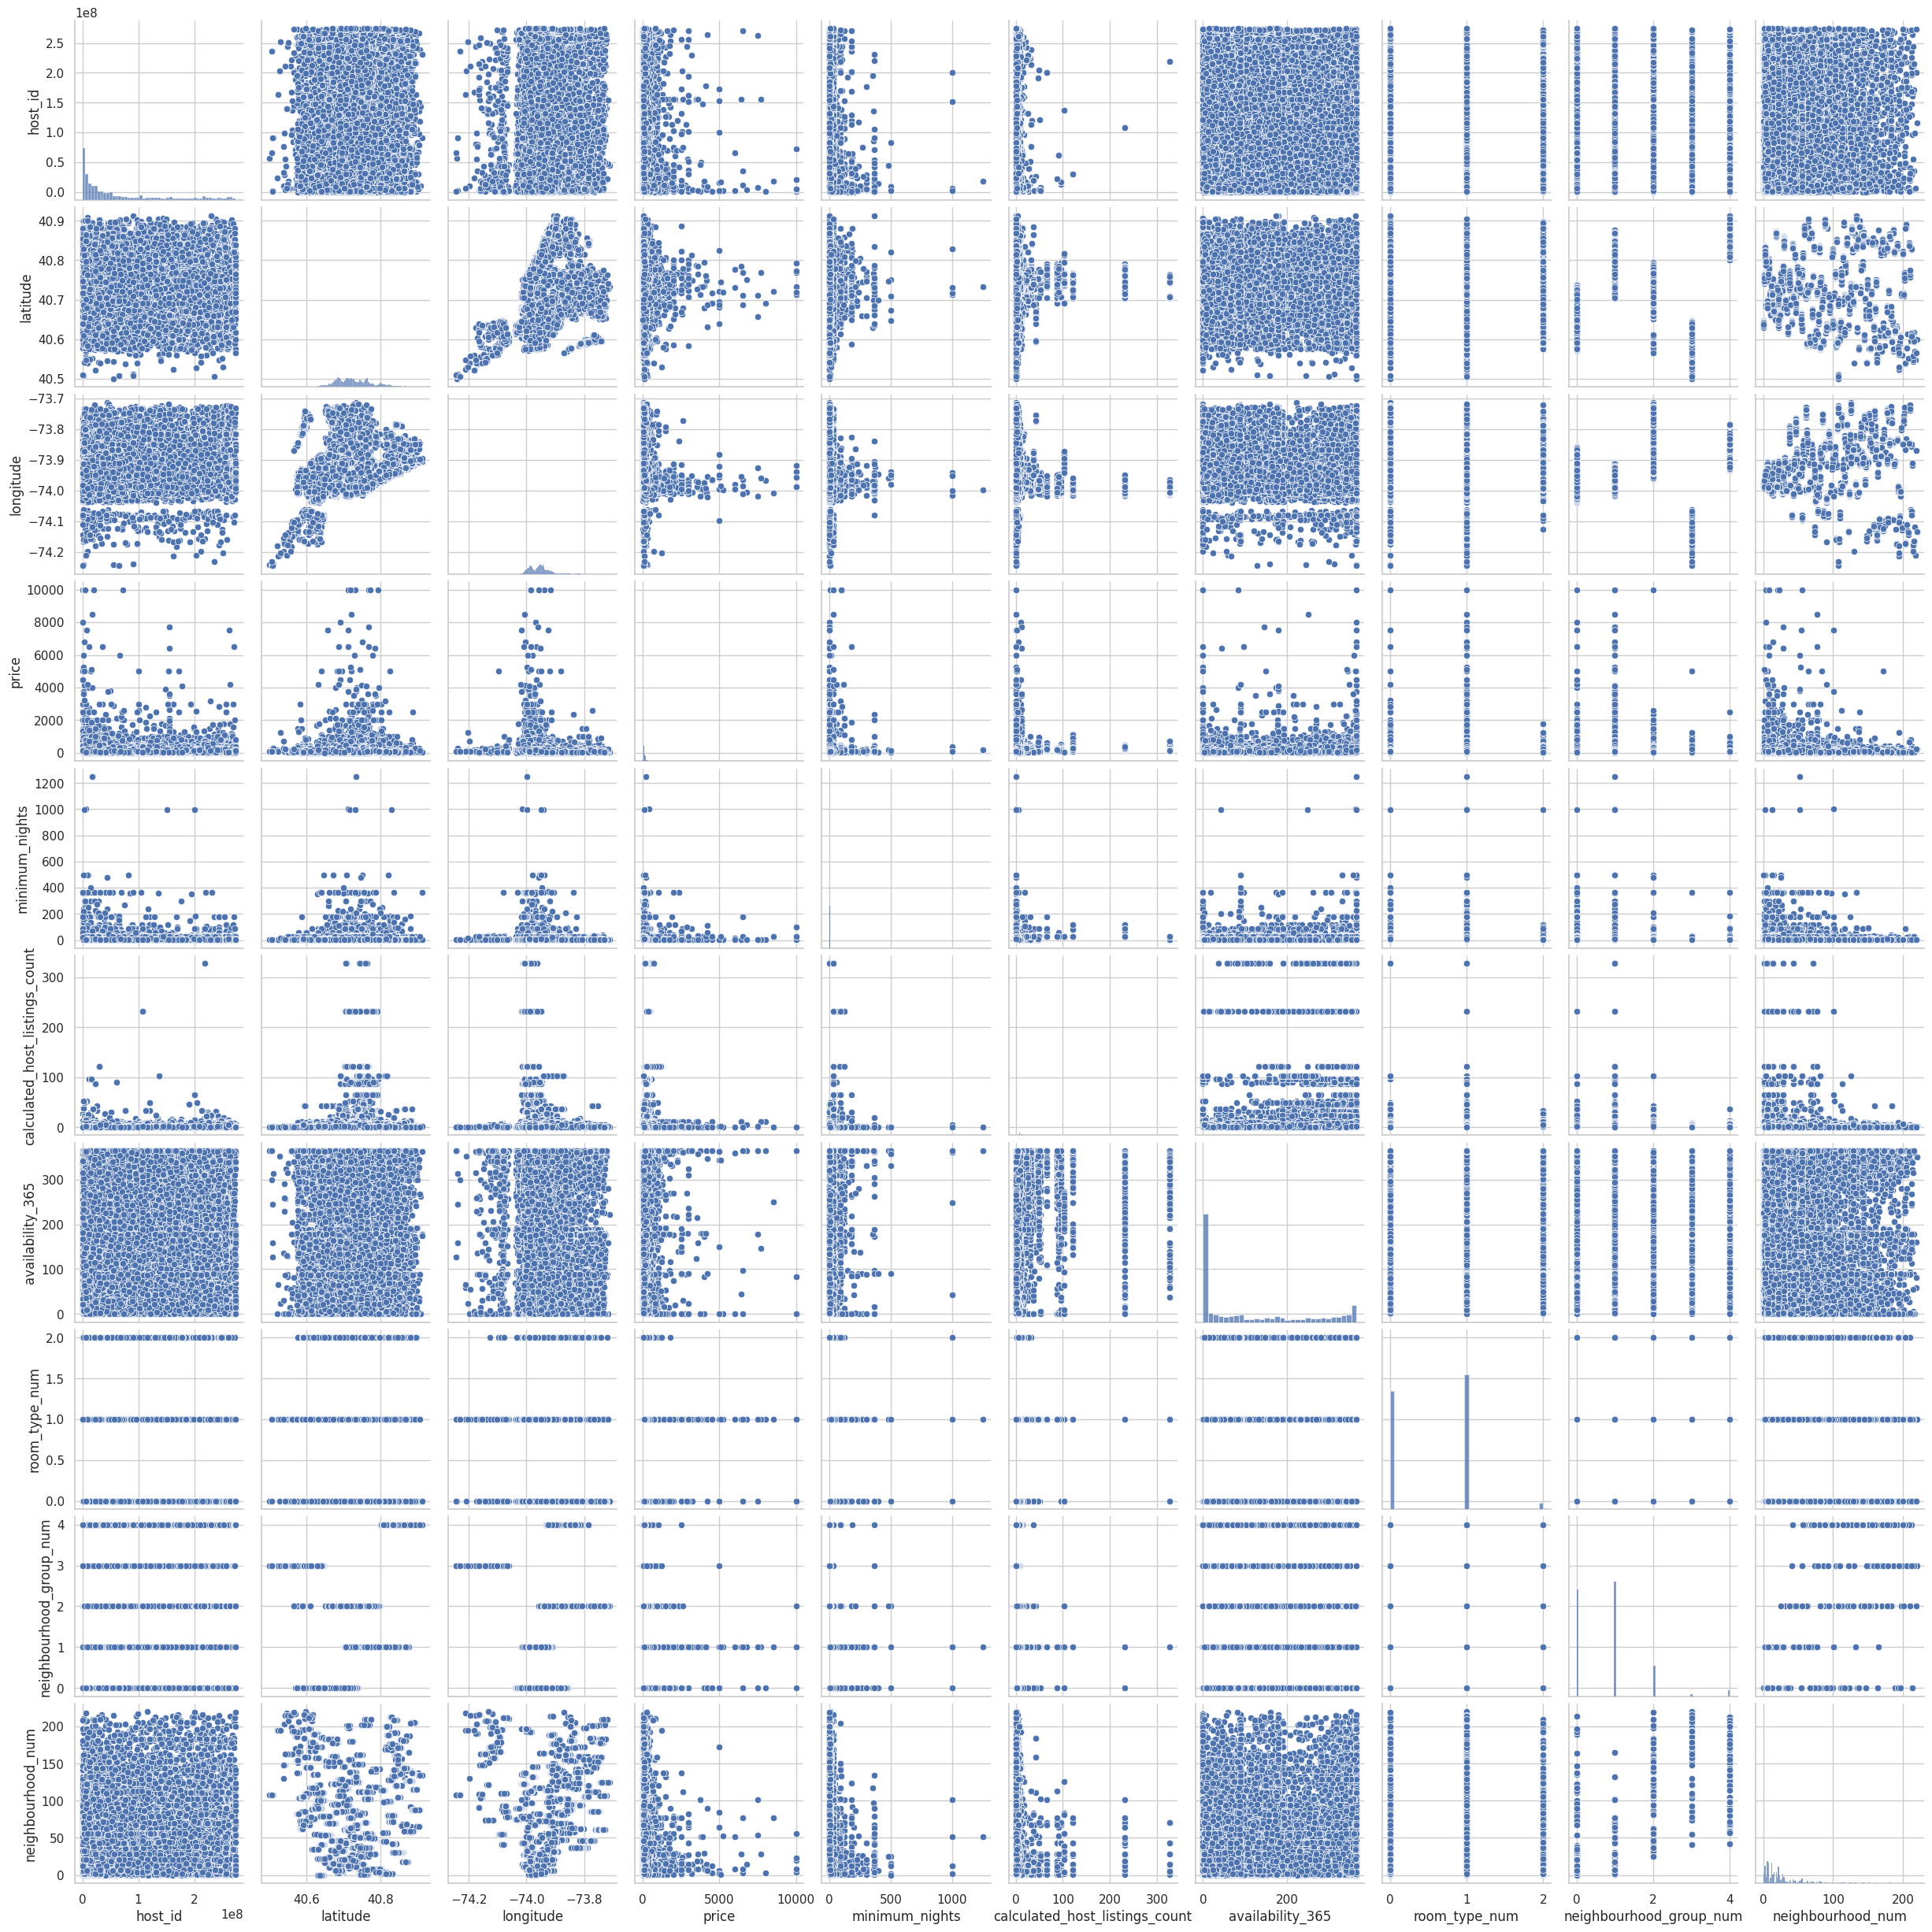

In [63]:
sns.pairplot(data=df)
plt.show()

In [64]:
#Paso 5, ingeniería de características
df.describe()



,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,neighbourhood_num
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,7.143982,112.781327,0.567113,0.786911,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,32.952519,131.622289,0.541249,0.844386,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,327.000000,365.000000,2.000000,4.000000,220.000000


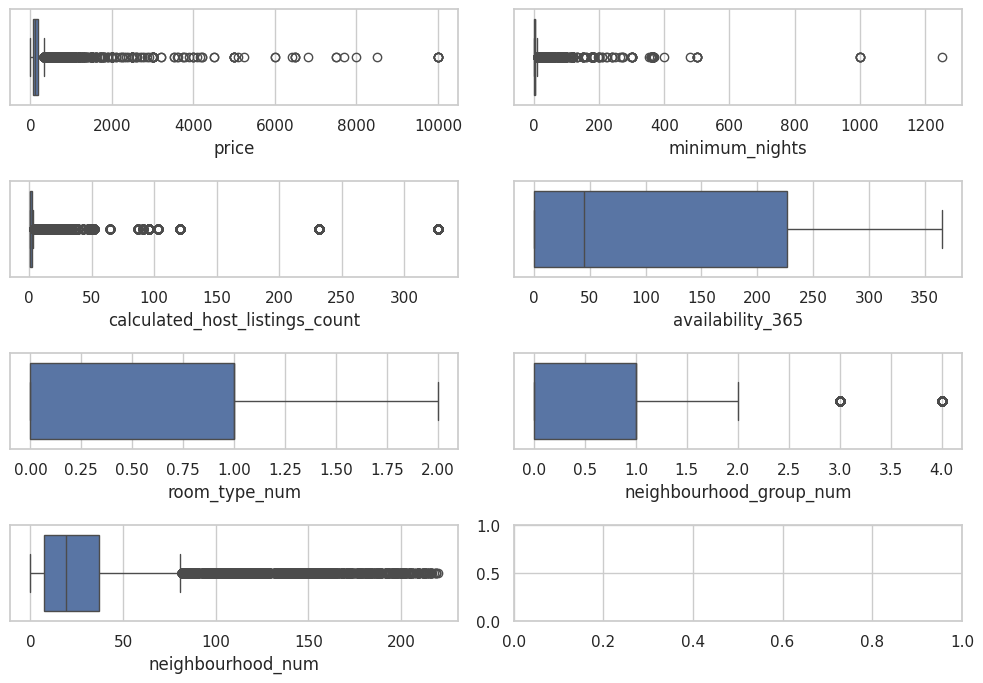

In [ ]:

listado_boxplots = ['price','minimum_nights','calculated_host_listings_count','availability_365','room_type_num','neighbourhood_group_num','neighbourhood_num']

fig,axis = plt.subplots(4,2, figsize=(10,7))

contador = 0
for i in range(4):
    for j in range(2):
        if contador < len(listado_boxplots):
            sns.boxplot(ax=axis[i,j], data=df, x=listado_boxplots[contador])
            contador += 1
        else:
            break
            
plt.tight_layout()
plt.show()
    

In [74]:
#sacaremos los atipicos de la variable Y que quiero predecir (PRECIO)
stats_price = df['price'].describe()
stats_price


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [82]:
#ahora saco los límites

data = stats_price["75%"] - stats_price["25%"]   # este es el rango intercuartil
upper_limit = stats_price["75%"] + 1.5 * data   # cualquier valor por encima de esto es un outlier
lower_limit = stats_price["25%"] - 1.5 * data   # cualquier valor por debajo de esto es un outlier

print(f'los límites para encontrar outliers son{round(lower_limit),round(upper_limit)}')


los límites para encontrar outliers son(-90, 334)


In [83]:
#Como se ve que hay precios que son 0, no tiene sentido que un arriendo sea 0
#Entonces se eliminarán los precios que sean 0
df = df[df['price'] > 0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   calculated_host_listings_count  48884 non-null  int64  
 9   availability_365                48884 non-null  int64  
 10  room_type_num                   48884 non-null  int64  
 11  neighbourhood_group_num         48884 non-null  int64  
 12  neighbourhood_num               48884